# Classification

Classification models aim to provide an automated decision such as is this e-mail spam?
Most classification models return a probability or propensity of belonging to a class of interest.
A cut-off can then be used to convert the propensity score to a decision. It follows the general approach:

1. Establish a cutoff probability for the class of interest above which we consider a record as belonging to that class.
2. Estimate (with any model) the probability that a record belongs to the class of interest.
3. If that probability is above the cutoff probability, assign the new record to the class of interest.

The higher the cutoff, the fewer records predicted as that class.

## Naive Bayes

The naive Bayes algorithm uses the probability of observing predictor values,
given an outcome, to estimate the probability of observing outcome $Y = i$, given
a set of predictor values.

- **Conditional probability**: The probability of observing some event (say $X = i$) given some other event (say $Y = i$), written as $P(X_i | Y_i)$.
- **Posterior probability**: The probability of an outcome after the predictor information has been incorporated (in contrast to the prior probability of outcomes, not taking predictor information into account).

To understand Bayesian classification, we can start out by imagining "nonnaive"
Bayesian classification. For each record to be classified:
1. Find all the other records with the same predictor profile (i.e., where the predictor values are the same).
2. Determine what classes those records belong to and which class is most prevalent (i.e., probable).
3. Assign that class to the new record.

The preceding approach amounts to finding all the records in the sample that are
exactly like the new record to be classified in the sense that all the predictor
values are identical.

### Why Exact Bayesian Classification Is Impractical

When the number of predictor variables exceeds a handful, many of the records
to be classified will be without exact matches e.g. male Hispanic with high income from the US Midwest who voted in the last
election, did not vote in the prior election, has three daughters and one son, and
is divorced.

_Despite its name, naive Bayes is not considered a method of Bayesian statistics. Naive Bayes
is a data–driven, empirical method requiring relatively little statistical expertise. The name
comes from the Bayes rule–like calculation in forming the predictions—specifically the initial
calculation of predictor value probabilities given an outcome, and then the final calculation of
outcome probabilities._

### The Naive Solution

In the naive Bayes solution, we no longer restrict the probability calculation to
those records that match the record to be classified. Instead, we use the entire
data set. The naive Bayes modification is as follows:

1. For a binary response $Y = i$ ($i = 0$ or $1$), estimate the individual conditional probabilities for each predictor $P(X_j|Y=i)$; these are the probabilities that the predictor value is in the record when we observe $Y = i$. This probability is estimated by the proportion of $X_j$ values among the $Y = i$ records in the training set
2. Multiply these probabilities by each other, and then by the proportion of records belonging to $Y = i$
3. Repeat steps 1 and 2 for all the classes
4. Estimate a probability for outcome $i$ by taking the value calculated in step 2 for class $i$ and dividing it by the sum of such values for all classes.
5. Assign the record to the class with the highest probability for this set of predictor values.

This naive Bayes algorithm can also be stated as an equation for the probability
of observing outcome $Y = i$, given a set of predictor values $X_1, ...,X_p$:

\begin{equation}
P(X_1, X_2, ..., X_p)
\end{equation}

The value of $P(X_1, X_2, ..., X_p)$ is a scaling factor to ensure the probability
is between 0 and 1 and does not depend on Y:

\begin{equation}
P(X_1, X_2, ..., X_p) = P(Y=0)(P(X_1|Y=0)P(X_2|Y=0)...P(X_p|Y=0)) + P(Y=1)(P(X_1|Y=1)P(X_2|Y=1)...P(X_p|Y=1))
\end{equation}

**Why is this formula called “naive”? We have made a simplifying assumption
that the exact conditional probability of a vector of predictor values, given
observing an outcome, is sufficiently well estimated by the product of the
individual conditional probabilities $P(X_j|Y=i)$. In other words, in
estimating $P(X_j|Y=i)$ instead of $P(X_1, X_2, ..., X_p | Y=i)$, we are assuming $X_j$
is independent of all the other predictor variables $X_{k for} K\neq j$**

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. (For theoretical reasons why naive Bayes works well, and on which types of data it does, see the references below.)

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.

#### Note
_When a predictor category is absent in the training data, the algorithm assigns zero probability
to the outcome variable in new data, rather than simply ignoring this variable and using the
information from other variables, as other methods might. This is something to pay attention to
when binning continuous variables._

### Numeric Predictor Variables

From the definition, we see that the Bayesian classifier works only with
categorical predictors (e.g., with spam classification, where presence or absence
of words, phrases, characters, and so on, lies at the heart of the predictive task).
To apply naive Bayes to numerical predictors, one of two approaches must be
taken:
- Bin and convert the numerical predictors to categorical predictors and apply the algorithm of the previous section.
- Use a probability model—for example, the normal distribution to estimate the conditional probability $P(X_j|Y=i)$

### Key Takeaways

- Naive Bayes works with categorical (factor) predictors and outcomes.
- It asks, "Within each outcome category, which predictor categories are most probable?"
- That information is then inverted to estimate probabilities of outcome categories, given predictor values.

## Discriminant Analysis

Discriminant analysis is the earliest statistical classifier; it was introduced by R.
A. Fisher in 1936

- **Covariance**: A measure of the extent to which one variable varies in concert with another (i.e., similar magnitude and direction).
- **Discriminant function**: The function that, when applied to the predictor variables, maximizes the separation of the classes.
- **Discriminant weights**: The scores that result from the application of the discriminant function, and are used to estimate probabilities of belonging to one class or another.

While discriminant analysis encompasses several techniques, the most commonly used is linear discriminant analysis, or LDA. LDA is now less widely used with the advent of more
sophisticated techniques, such as tree models and logistic regression.

However, you may still encounter LDA in some applications and it has links to
other more widely used methods (such as principal components analysis). In addition, discriminant analysis can
provide a measure of predictor importance, and it is used as a computationally
efficient method of feature selection.

#### Note
Linear discriminant analysis should not be confused with Latent Dirichlet Allocation, also
referred to as LDA. Latent Dirichlet Allocation is used in text and natural language processing
and is unrelated to linear discriminant analysis.

### Covariance Matrix

covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (that is, the variables tend to show opposite behavior), the covariance is negative. The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables

To understand discriminant analysis, it is first necessary to introduce the concept
of covariance between two or more variables. The covariance measures the
relationship between two variables $x$ and $z$. Denote the mean for each variable
by $\overline{x}$ and $\overline{z}$. The covariance $S_{x,z}$ between $x$ and $z$ is given by:
\begin{equation}
S_{x,z} = \frac{\sum_{i=1}^{n}(x-\overline{x})(z-\overline{z})}{n-1}
\end{equation}
where n is the number of records.

As with the correlation coefficient, positive values indicate a
positive relationship and negative values indicate a negative relationship.
Correlation, however, is constrained to be between –1 and 1, whereas covariance
is on the same scale as the variables $x$ and $z$. The covariance matrix $\sum$ for $x$
and $z$ consists of the individual variable variances, $S^2_x$ and $S^2_y$, on the diagonal
(where row and column are the same variable) and the covariances between
variable pairs on the off-diagonals.

\begin{equation}
\hat{\sum} = \begin{bmatrix}
S^2_x & S_{x,z} \\
S_{x,z} & S^2_z \\
\end{bmatrix}
\end{equation}

### Fisher’s Linear Discriminant

For simplicity, we focus on a classification problem in which we want to predict
a binary outcome y using just two continuous numeric variables $(x,z)$.
Technically, discriminant analysis assumes the predictor variables are normally
distributed continuous variables, but, in practice, the method works well even for
nonextreme departures from normality, and for binary predictors. Fisher’s linear
discriminant distinguishes variation between groups, on the one hand, from
variation within groups on the other. Specifically, seeking to divide the records
into two groups, LDA focuses on maximizing the "between" sum of squares $SS_{between}$
(measuring the variation between the two groups) relative to the
"within" sum of squares $SS_{within}$ (measuring the within-group variation). In this
case, the two groups correspond to the records $(x_0, z_0)$ for which $y = 0$ and the
records $(x_1, z_1)$ for which $y = 1$. The method finds the linear combination $w_{x}x+w_{z}z$
that maximizes that sum of squares ratio.

\begin{equation}
\frac{SS_{between}}{SS_{within}}
\end{equation}

The between sum of squares is the squared distance between the two group
means, and the within sum of squares is the spread around the means within each
group, weighted by the covariance matrix. Intuitively, by maximizing the
between sum of squares and minimizing the within sum of squares, this method
yields the greatest separation between the two groups.

### Key Takeaways

- Discriminant analysis works with continuous or categorical predictors, as well as categorical outcomes.
- Using the covariance matrix, it calculates a linear discriminant function, which is used to distinguish records belonging to one class from those belonging to another.
- This function is applied to the records to derive weights, or scores, for each record (one weight for each possible class) that determines its estimated class.

## Logistic Regression

Logistic regression is analogous to multiple linear regression, except the
outcome is binary. Various transformations are employed to convert the problem
to one in which a linear model can be fit

- **Logit**: The function that maps the probability of belonging to a class with a range from ± ∞ (instead of 0 to 1).
    - _Synonym_: Log odds
- **Odds**: The ratio of “success” (1) to "not success" (0).
- **Log odds**: The response in the transformed model (now linear), which gets mapped back to a probability.

### Logistic Response Function and Logit

The key ingredients are the logistic response function and the logit, in which we
map a probability (which is on a 0-1 scale) to a more expansive scale suitable
for linear modeling.

The first step is to think of the outcome variable not as a binary label, but as the
probability p that the label is a "1". Naively, we might be tempted to model p as
a linear function of the predictor variables:

\begin{equation}
p=\beta_0+\beta_1x_1+\beta_2x_2 + \cdots + \beta_qx_q
\end{equation}

However, fitting this model does not ensure that p will end up between 0 and 1,
as a probability must.
Instead, we model p by applying a logistic response or inverse logit function to
the predictors:
\begin{equation}
p=\frac{1}{1+e^{-(\beta_0+\beta_1x_1+\beta_2x_2 + \cdots + \beta_qx_q)}}
\end{equation}

This transform ensures that the p stays between 0 and 1.

In terms of probabilities, odds are the
probability of an event divided by the probability that the event will not occur.
For example, if the probability that a horse will win is 0.5, the probability of
"won’t win" is (1 – 0.5) = 0.5, and the odds are 1.0

\begin{equation}
Odds(Y=1)=\frac{p}{1-p}
\end{equation}

We combine this with the logistic response function, shown earlier, to get:

\begin{equation}
Odds(Y=1)=e^{\beta_0+\beta_1x_1+\beta_2x_2 + \cdots + \beta_qx_q}
\end{equation}

Finally, taking the logarithm of both sides, we get an expression that involves a
linear function of the predictors:

ccccc

The log-odds function, also known as the logit function, maps the probability p
from (0, 1) to any value $(-\infty, +\infty)$:

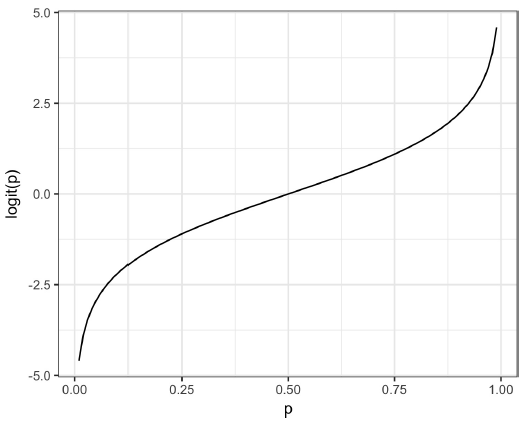

### Predicted Values from Logistic Regression

The predicted value from logistic regression is in terms of the log odds: $\hat{Y}=log(Odds(Y=1))$
The predicted probability is given by the logistic response function:
\begin{equation}
\hat{p} = \frac{1}{1+e^{-\hat{Y}}}
\end{equation}

### Interpreting the Coefficients and Odds Ratios

One advantage of logistic regression is that it produces a model that can be
scored to new data rapidly, without recomputation. Another is the relative ease
of interpretation of the model, as compared with other classification methods.
The key conceptual idea is understanding an odds ratio. The odds ratio is easiest
to understand for a binary factor variable X:

\begin{equation}
Odds\ Ratio = \frac{Odds(Y=1|X=1)}{Odds(Y=1|X=0)}
\end{equation}

This is interpreted as the odds that Y = 1 when X = 1 versus the odds that Y = 1
when X = 0. If the odds ratio is 2, then the odds that Y = 1 are two times higher
when X = 1 versus X = 0.

Why bother with an odds ratio, instead of probabilities? We work with odds
because the coefficient $\beta_j$ in the logistic regression is the log of the odds ratio for $X_j$

For example, the regression coefficient for
`purpose_small_business` (calculation not shown) is 1.21226. This means that a loan to a small
business compared to a loan to pay off credit card debt reduces the odds of
defaulting versus being paid off by . Clearly, loans for
the purpose of creating or expanding a small business are considerably riskier
than other types of loans.

### Linear and Logistic Regression: Similarities and Differences

Multiple linear regression and logistic regression share many commonalities.
Both assume a parametric linear form relating the predictors with the response.
Exploring and finding the best model are done in very similar ways. Generalities
to the linear model to use a spline transform of the predictor are equally
applicable in the logistic regression setting. Logistic regression differs in two
fundamental ways:
- The way the model is fit (least squares is not applicable)
- The nature and analysis of the residuals from the model

#### Fitting the model

Linear regression is fit using least squares, and the quality of the fit is evaluated
using RMSE and R-squared statistics. In logistic regression (unlike in linear
regression), there is no closed-form solution and the model must be fit using
maximum likelihood estimation (MLE).**Maximum likelihood estimation is a
process that tries to find the model that is most likely to have produced the data
we see.** In the logistic regression equation, the response is not 0 or 1 but rather
an estimate of the log odds that the response is 1. The MLE finds the solution
such that the estimated log odds best describes the observed outcome. The
mechanics of the algorithm involve a quasi-Newton optimization that iterates
between a scoring step (Fisher’s scoring), based on the current parameters, and
an update to the parameters to improve the fit.

##### Maximum Likelihood Estimation
More detail, if you like statistical symbols: start with a set of data $(X_1, X_2, \cdots, X_n)$
and a probability model $P_\theta(X_1, X_2, \cdots, X_n)$ that
depends on a set of parameters $\theta$. The goal of MLE is to find the set of
parameters $\hat{\theta}$ that maximizes the value of $P_\theta(X_1, X_2, \cdots, X_n)$; that is, it
maximizes the probability of observing $(X_1, X_2, \cdots, X_n)$ given the
model $P$ In the fitting process, the model is evaluated using a metric called
_deviance_:

\begin{equation}
deviance = -2log(P_{\hat{\theta}}(X_1, X_2, \cdots, X_n))
\end{equation}

Lower deviance corresponds to a better fit.

### Assessing the Model

Like other classification methods, logistic regression is assessed by how
accurately the model classifies new data. As with linear regression, some additional standard statistical tools are
available to assess and improve the model.

Many other concepts for linear regression carry over to the logistic regression
setting (and other GLMs). For example, you can use stepwise regression, fit
interaction terms, or include spline terms. The same concerns regarding
confounding and correlated variables apply to logistic regression.

### Key Takeaways

- Logistic regression is like linear regression, except that the outcome is a binary variable
- Several transformations are needed to get the model into a form that can be fit as a linear model, with the log of the odds ratio as the response variable
- After the linear model is fit (by an iterative process), the log odds is mapped back to a probability
- Logistic regression is popular because it is computationally fast, and produces a model that can be scored to new data without recomputation

## Evaluating Classification Methods

- **Accuracy**: The percent (or proportion) of cases classified correctly.
- **Confusion matrix**: A tabular display (2×2 in the binary case) of the record counts by their predicted and actual classification status.
- **Sensitivity**: The percent (or proportion) of 1s correctly classified.
    - _Synonym_: Recall
- **Specificity**: The percent (or proportion) of 0s correctly classified.
- **Precision**: The percent (proportion) of predicted 1s that are actually 1s.
- **ROC curve**: A plot of sensitivity versus specificity.
- **Lift**: A measure of how effective the model is at identifying (comparitively rare) 1s at different probability cutoffs.

A simple way to measure classification performance is to count the proportion of predictions that are correct.

Accuracy is simply a measure of total error:

\begin{equation}
accuracy = \frac{\sum TruePositive+\sum TrueNegative}{SampleSize}
\end{equation}

### Confusion Matrix

At the heart of classification metrics is the confusion matrix. The confusion
matrix is a table showing the number of correct and incorrect predictions
categorized by type of response.

Imagine a model that was
trained on a balanced data set with an equal number of defaulted and paid-off
loans. Following the usual conventions Y = 1 corresponds to the
event of interest (e.g., default) and Y = 0 corresponds to a negative (or usual)
event (e.g., paid off). The predicted outcomes are columns and the true outcomes are the rows. The
diagonal elements of the matrix show the number of correct predictions and the
off-diagonal elements show the number of incorrect predictions.

Below shows the relationship between the confusion matrix for a binary
reponse Y and different metrics. The diagonal boxes (upper left, lower
right) show when the predictions correctly predict the response. One important
metric not explicitly called out is the false positive rate (the mirror image of
precision). When 1s are rare, the ratio of false positives to all predicted positives
can be high, leading to the unintuitive situation where a predicted 1 is most
likely a 0. This problem plagues medical screening tests (e.g., mammograms)
that are widely applied: due to the relative rarity of the condition, positive test
results most likely do not mean breast cancer. This leads to much confusion in
the public.

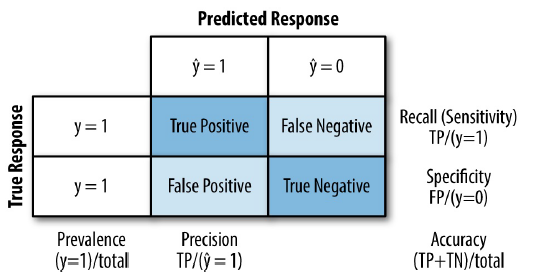

### The Rare Class Problem

In many cases, there is an imbalance in the classes to be predicted, with one
class much more prevalent than the other—for example, legitimate insurance
claims versus fraudulent ones, or browsers versus purchasers at a website. The
rare class (e.g., the fraudulent claims) is usually the class of more interest, and is
typically designated 1, in contrast to the more prevalent 0s. In the typical
scenario, the 1s are the more important case, in the sense that misclassifying
them as 0s is costlier than misclassfying 0s as 1s.

In such cases, unless the classes are easily separable, the most accurate
classification model may be one that simply classifies everything as a 0. For
example, if only 0.1% of the browsers at a web store end up purchasing, a model
that predicts that each browser will leave without purchasing will be 99.9%
accurate. However, it will be useless. Instead, we would be happy with a model
that is less accurate overall, but is good at picking out the purchasers, even if it
misclassifies some nonpurchasers along the way.

### Precision, Recall, and Specificity

Metrics other than pure accuracy—metrics that are more nuanced—are
commonly used in evaluating classification models. Several of these have a long
history in statistics—especially biostatistics, where they are used to describe the
expected performance of diagnostic tests. The precision measures the accuracy
of a predicted positive outcome:

\begin{equation}
precision = \frac{\sum TruePositive}{\sum TruePositive + \sum FalsePositive}
\end{equation}

The recall, also known as sensitivity, measures the strength of the model to
predict a positive outcome—the proportion of the 1s that it correctly identifies.
The definition of recall is:

\begin{equation}
recall = \frac{\sum TruePositive}{\sum TruePositive + \sum FalseNegative}
\end{equation}

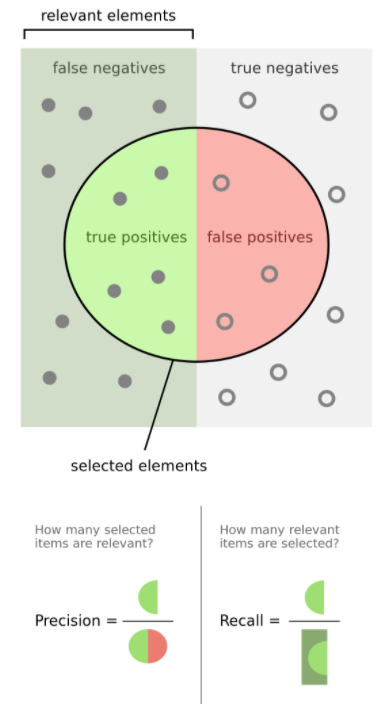

Another metric used is specificity, which measures a model’s ability to predict a
negative outcome:

\begin{equation}
specificity = \frac{\sum TrueNegative}{\sum TrueNegative + \sum FalseNegative}
\end{equation}

### ROC Curve

You can see that there is a tradeoff between recall and specificity. Capturing
more 1s generally means misclassifying more 0s as 1s. The ideal classifier
would do an excellent job of classifying the 1s, without misclassifying more 0s
as 1s.

The metric that captures this tradeoff is the "Receiver Operating Characteristics"
curve, usually referred to as the ROC curve. The ROC curve plots recall
(sensitivity) on the y-axis against specificity on the x-axis. The ROC curve
shows the trade-off between recall and specificity as you change the cutoff to
determine how to classify a record. Sensitivity (recall) is plotted on the y-axis,
and you may encounter two forms in which the x-axis is labeled:
- Specificity plotted on the x-axis, with 1 on the left and 0 on the right
- Specificity plotted on the x-axis, with 0 on the left and 1 on the right

The curve looks identical whichever way it is done. The process to compute the ROC curve is:
1. Sort the records by the predicted probability of being a 1, starting with the most probable and ending with the least probable.
2. Compute the cumulative specificity and recall based on the sorted records.
The result is shown below. The dotted diagonal line corresponds to a
classifier no better than random chance. An extremely effective classifier will have an ROC that
hugs the upper-left corner—it will correctly identify lots of 1s without
misclassifying lots of 0s as 1s.

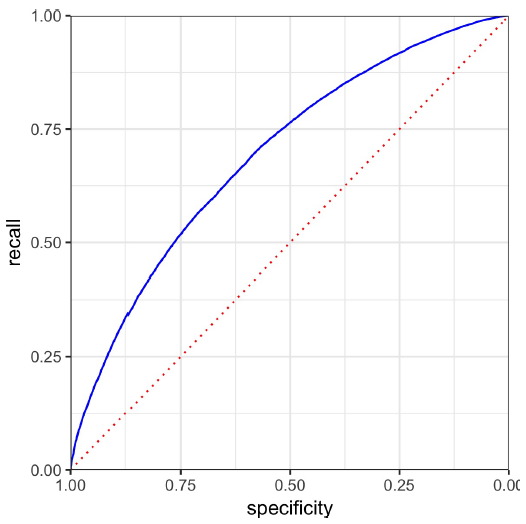

### AUC

The ROC curve is a valuable graphical tool but, by itself, doesn’t constitute a
single measure for the performance of a classifier. The ROC curve can be used,
however, to produce the area underneath the curve (AUC) metric. AUC is simply
the total area under the ROC curve. The larger the value of AUC, the more
effective the classifier. An AUC of 1 indicates a perfect classifier: it gets all the
1s correctly classified, and doesn’t misclassify any 0s as 1s. A completely ineffective classifier—the diagonal line—will have an AUC of 0.5.

The model has an AUC of about 0.59, corresponding to a relatively weak
classifier:

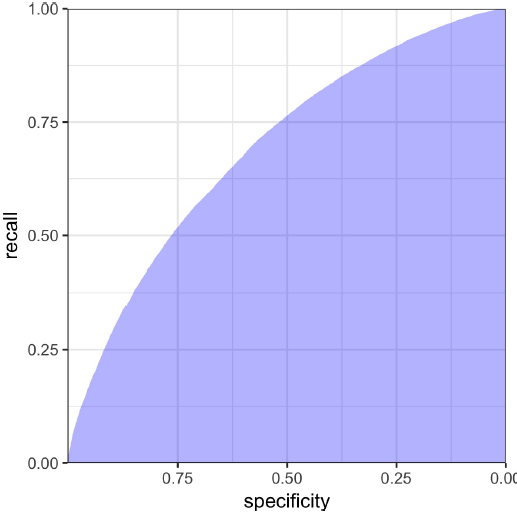

#### FALSE POSITIVE RATE CONFUSION
**False positive/negative rates are often confused or conflated with specificity or sensitivity.
Sometimes the false positive rate is defined as the
proportion of true negatives that test positive. In many cases (such as network intrusion
detection), the term is used to refer to the proportion of positive signals that are true negatives.**

### Lift

Using the AUC as a metric is an improvement over simple accuracy, as it can
assess how well a classifier handles the tradeoff between overall accuracy and
the need to identify the more important 1s. But it does not completely address
the rare-case problem, where you need to lower the model’s probability cutoff
below 0.5 to avoid having all records classified as 0. In such cases, for a record
to be classified as a 1, it might be sufficient to have a probability of 0.4, 0.3, or
lower. In effect, we end up overidentifying 1s, reflecting their greater
importance.

Changing this cutoff will improve your chances of catching the 1s (at the cost of
misclassifying more 0s as 1s). But what is the optimum cutoff?

The concept of lift lets you defer answering that question. Instead, you consider
the records in order of their predicted probability of being 1s. Say, of the top
10% classified as 1s, how much better did the algorithm do, compared to the
benchmark of simply picking blindly? If you can get 0.3% response in this top
decile instead of the 0.1% you get overall picking randomly, the algorithm is said
to have a lift (also called gains) of 3 in the top decile. A lift chart (gains chart)
quantifies this over the range of the data. It can be produced decile by decile, or
continuously over the range of the data.

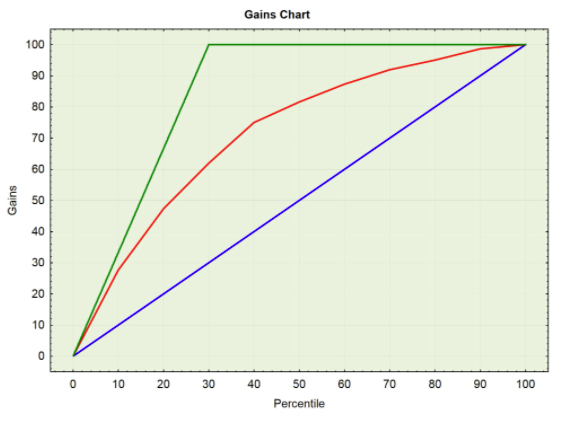

To compute a lift chart, you first produce a cumulative gains chart that shows the
recall on the y-axis and the total number of records on the x-axis. The lift curve
is the ratio of the cumulative gains to the diagonal line corresponding to random
selection.

A lift curve lets you look at the consequences of setting different probability
cutoffs for classifying records as 1s. It can be an intermediate step in settling on
an appropriate cutoff level. For example, a tax authority might only have a
certain amount of resources that it can spend on tax audits, and want to spend
them on the likeliest tax cheats. With its resource constraint in mind, the
authority would use a lift chart to estimate where to draw the line between tax
returns selected for audit and those left alone.

#### Uplift

Sometimes the term uplift is used to mean the same thing as lift. An alternate meaning is used
in a more restrictive setting, when an A-B test has been conducted and the treatment (A or B)
is then used as a predictor variable in a predictive model. The uplift is the improvement in
response predicted for an individual case with treatment A versus treatment B. This is
determined by scoring the individual case first with the predictor set to A, and then again with
the predictor toggled to B.

### Key Takeaways

- Accuracy (the percent of predicted classifications that are correct) is but a first step in evaluating a model.
- Other metrics (recall, specificity, precision) focus on more specific performance characteristics (e.g., recall measures how good a model is at correctly identifying 1s).
- AUC (area under the ROC curve) is a common metric for the ability of a model to distinguish 1s from 0s.
- Similarly, lift measures how effective a model is in identifying the 1s, and it is often calculated decile by decile, starting with the most probable 1s.